In [1]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

tf.compat.v1.disable_eager_execution()

import string 

file = open("./Data/notario_utf8.txt", "r", encoding = "ISO-8859-1")

    
lines = []
c=0
for i in file:
    c+=1
    #print(c)
    try:
        lines.append(i)
    except: 
        print("An error occured") 
    
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)

In [2]:
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]

vocab_size = len(tokenizer.word_index) + 1

sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
sequences = np.array(sequences)

X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

y = to_categorical(y, num_classes=vocab_size)

In [3]:
import keras 
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten


model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [5]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01))
history=model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


Train on 9724 samples
Epoch 1/150
9724/9724 [==============================] - ETA: 0s - loss: 8.9974
Epoch 00001: loss improved from inf to 8.99743, saving model to nextword1.h5
9724/9724 [==============================] - 32s 3ms/sample - loss: 8.9974 - lr: 0.0100
Epoch 2/150
9724/9724 [==============================] - ETA: 0s - loss: 8.7887
Epoch 00002: loss improved from 8.99743 to 8.78867, saving model to nextword1.h5
9724/9724 [==============================] - 29s 3ms/sample - loss: 8.7887 - lr: 0.0100
Epoch 3/150
9724/9724 [==============================] - ETA: 0s - loss: 8.6337
Epoch 00003: loss improved from 8.78867 to 8.63369, saving model to nextword1.h5
9724/9724 [==============================] - 27s 3ms/sample - loss: 8.6337 - lr: 0.0100
Epoch 4/150
9724/9724 [==============================] - ETA: 0s - loss: 8.4308
Epoch 00004: loss improved from 8.63369 to 8.43080, saving model to nextword1.h5
9724/9724 [==============================] - 28s 3ms/sample - loss: 8.4308

Epoch 34/150
9724/9724 [==============================] - ETA: 0s - loss: 4.1507
Epoch 00034: loss improved from 4.23992 to 4.15067, saving model to nextword1.h5
9724/9724 [==============================] - 32s 3ms/sample - loss: 4.1507 - lr: 0.0100
Epoch 35/150
9724/9724 [==============================] - ETA: 0s - loss: 4.0488
Epoch 00035: loss improved from 4.15067 to 4.04876, saving model to nextword1.h5
9724/9724 [==============================] - 33s 3ms/sample - loss: 4.0488 - lr: 0.0100
Epoch 36/150
9724/9724 [==============================] - ETA: 0s - loss: 3.9836
Epoch 00036: loss improved from 4.04876 to 3.98357, saving model to nextword1.h5
9724/9724 [==============================] - 30s 3ms/sample - loss: 3.9836 - lr: 0.0100
Epoch 37/150
9724/9724 [==============================] - ETA: 0s - loss: 3.9071
Epoch 00037: loss improved from 3.98357 to 3.90711, saving model to nextword1.h5
9724/9724 [==============================] - 29s 3ms/sample - loss: 3.9071 - lr: 0.0100


Epoch 67/150
9724/9724 [==============================] - ETA: 0s - loss: 2.2889
Epoch 00067: loss did not improve from 2.25085
9724/9724 [==============================] - 27s 3ms/sample - loss: 2.2889 - lr: 0.0100
Epoch 68/150
9724/9724 [==============================] - ETA: 0s - loss: 2.2113
Epoch 00068: loss improved from 2.25085 to 2.21129, saving model to nextword1.h5
9724/9724 [==============================] - 31s 3ms/sample - loss: 2.2113 - lr: 0.0100
Epoch 69/150
9724/9724 [==============================] - ETA: 0s - loss: 2.1738
Epoch 00069: loss improved from 2.21129 to 2.17378, saving model to nextword1.h5
9724/9724 [==============================] - 30s 3ms/sample - loss: 2.1738 - lr: 0.0100
Epoch 70/150
9724/9724 [==============================] - ETA: 0s - loss: 2.1579
Epoch 00070: loss improved from 2.17378 to 2.15790, saving model to nextword1.h5
9724/9724 [==============================] - 28s 3ms/sample - loss: 2.1579 - lr: 0.0100
Epoch 71/150
9724/9724 [==========

Epoch 100/150
9724/9724 [==============================] - ETA: 0s - loss: 1.0433
Epoch 00100: loss improved from 1.05410 to 1.04327, saving model to nextword1.h5
9724/9724 [==============================] - 28s 3ms/sample - loss: 1.0433 - lr: 0.0020
Epoch 101/150
9724/9724 [==============================] - ETA: 0s - loss: 1.0372
Epoch 00101: loss improved from 1.04327 to 1.03723, saving model to nextword1.h5
9724/9724 [==============================] - 30s 3ms/sample - loss: 1.0372 - lr: 0.0020
Epoch 102/150
9724/9724 [==============================] - ETA: 0s - loss: 1.0260
Epoch 00102: loss improved from 1.03723 to 1.02604, saving model to nextword1.h5
9724/9724 [==============================] - 28s 3ms/sample - loss: 1.0260 - lr: 0.0020
Epoch 103/150
9724/9724 [==============================] - ETA: 0s - loss: 1.0204
Epoch 00103: loss improved from 1.02604 to 1.02044, saving model to nextword1.h5
9724/9724 [==============================] - 28s 3ms/sample - loss: 1.0204 - lr: 0.0

Epoch 133/150
9724/9724 [==============================] - ETA: 0s - loss: 0.8105
Epoch 00133: loss improved from 0.81700 to 0.81048, saving model to nextword1.h5
9724/9724 [==============================] - 32s 3ms/sample - loss: 0.8105 - lr: 0.0020
Epoch 134/150
9724/9724 [==============================] - ETA: 0s - loss: 0.8081
Epoch 00134: loss improved from 0.81048 to 0.80807, saving model to nextword1.h5
9724/9724 [==============================] - 32s 3ms/sample - loss: 0.8081 - lr: 0.0020
Epoch 135/150
9724/9724 [==============================] - ETA: 0s - loss: 0.8033
Epoch 00135: loss improved from 0.80807 to 0.80330, saving model to nextword1.h5
9724/9724 [==============================] - 40s 4ms/sample - loss: 0.8033 - lr: 0.0020
Epoch 136/150
9724/9724 [==============================] - ETA: 0s - loss: 0.8007
Epoch 00136: loss improved from 0.80330 to 0.80070, saving model to nextword1.h5
9724/9724 [==============================] - 32s 3ms/sample - loss: 0.8007 - lr: 0.0

In [6]:
#from IPython.display import Image 
#pil_img = Image(filename='graph1.png')
#display(pil_img)

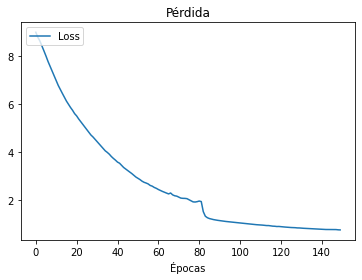

In [8]:
from matplotlib import pyplot as plt 

plt.plot(history.history['loss'], label='Loss')
#plt.plot(history.history['accuracy'], label='accuracy')

plt.title('Pérdida')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()